In [1]:
import torch
from torch_geometric.utils import to_networkx

In [7]:
# Imports.
import os
from utils import ROOT_DIR
import networkx as nx
from data.connectome_dataset import CElegansDataset

In [8]:
# Load the c. elegans connectome graph.
dataset = CElegansDataset(root=os.path.join(ROOT_DIR, 'data'))
graph = dataset[0]
G = to_networkx(graph)

HTTPError: HTTP Error 404: Not Found

In [7]:
# Metadata for nodes and edges.
labels = graph.id_neuron
sensory = [node for i,node in enumerate(G.nodes) if graph.y[i]==0.]
inter = [node for i,node in enumerate(G.nodes) if graph.y[i]==1.]
motor = [node for i,node in enumerate(G.nodes) if graph.y[i]==2.]
junctions = [edge for i,edge in enumerate(G.edges) if graph.edge_attr[i,0]==0.]
synapses = [edge for i,edge in enumerate(G.edges) if graph.edge_attr[i,1]==0.]

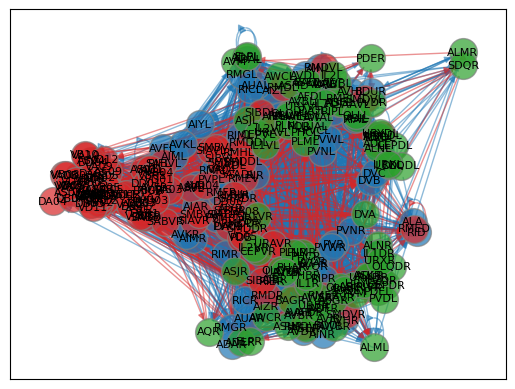

In [8]:
# Draw the graph of the C. elegans connectome using atlas coordinates.
options = {"edgecolors": "tab:gray", "node_size": 400, "alpha": 0.7}
pos = graph.pos
nx.draw_networkx_nodes(G, pos, nodelist=sensory, node_color="tab:blue", **options);
nx.draw_networkx_nodes(G, pos, nodelist=inter, node_color="tab:red", **options);
nx.draw_networkx_nodes(G, pos, nodelist=motor, node_color="tab:green", **options);
nx.draw_networkx_labels(G, pos, labels, font_size=8);
nx.draw_networkx_edges(G, pos, edgelist=junctions, alpha=0.5, edge_color="tab:blue");
nx.draw_networkx_edges(G, pos, edgelist=synapses, alpha=0.5, edge_color="tab:red");